In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter


In [2]:
harvard = pd.read_csv('harvard_SAT_income.csv')
raw_seda = pd.read_csv('seda_geodist_long_gcs_4.1.csv')

In [6]:
len(harvard['document'])

22768

In [7]:
harvard = harvard.drop(labels=['document','Flesch','Flesch.Kincaid','Dale.Chall','FOG','SMOG'], axis=1)
harvard = harvard.dropna()

In [8]:
raw_seda = raw_seda.drop(labels=['sedaleaname','fips','stateabb','sedalea','year','gcs_mnse_all','totgyb_all','gcs_mn_asn','gcs_mnse_asn','totgyb_asn','gcs_mn_blk','gcs_mnse_blk','gcs_mnse_ecd','totgyb_ecd','totgyb_blk','gcs_mn_fem','gcs_mnse_fem','totgyb_fem','gcs_mn_hsp','gcs_mnse_hsp','totgyb_hsp','gcs_mn_mal','gcs_mnse_mal','totgyb_mal','gcs_mn_mfg','gcs_mnse_mfg','totgyb_mfg','gcs_mn_mtr','gcs_mnse_mtr','totgyb_mtr','gcs_mn_nam','gcs_mnse_nam','totgyb_nam','gcs_mnse_nec','totgyb_nec','gcs_mn_neg','gcs_mnse_neg','totgyb_neg','gcs_mn_wag','gcs_mnse_wag','totgyb_wag','gcs_mn_wbg','gcs_mnse_wbg','totgyb_wbg','gcs_mn_whg','gcs_mnse_whg','totgyb_whg','gcs_mn_wht','gcs_mnse_wht','totgyb_wht','gcs_mn_wmg','gcs_mnse_wmg','totgyb_wmg','gcs_mn_wng','gcs_mnse_wng','totgyb_wng'], axis=1)
raw_seda = raw_seda.dropna()

In [9]:
grades = []
avg_scores = []
std = []
for i in range(raw_seda['grade'].min(), raw_seda['grade'].max()+1):
    grades.append(i)
    avg_scores.append(raw_seda.loc[raw_seda['grade'] == i]['gcs_mn_all'].mean())
    std.append(raw_seda.loc[raw_seda['grade'] == i]['gcs_mn_all'].std())
avg_scores = pd.DataFrame({'grades':grades,"average scores":avg_scores, "std": std})

<ErrorbarContainer object of 3 artists>

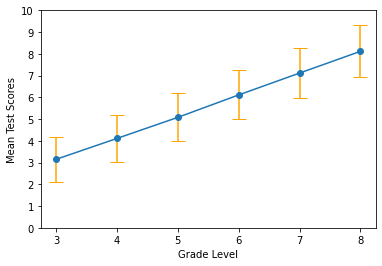

In [10]:
x = avg_scores['grades']
y = avg_scores['average scores']
error = avg_scores['std']
plt.ylim(0, 10)
plt.xlabel('Grade Level')
plt.ylabel('Mean Test Scores')
plt.locator_params(nbins=10)
plt.errorbar(x, y, yerr=error, marker='o', ecolor='orange', capsize=7)

In [11]:
seda = pd.DataFrame()
grades = []
avg_ECD_mth_score = []
avg_ECD_rla_score = []
avg_NEC_mth_score = []
avg_NEC_rla_score = []
avg_mth_score = []
avg_rla_score = []
for grade in range(raw_seda['grade'].min(), raw_seda['grade'].max() + 1):
    grades.append(grade)
    avg_ECD_mth_score.append(raw_seda.loc[(raw_seda['subject'] == 'mth') & (raw_seda['grade'] == grade)]['gcs_mn_ecd'].mean())
    avg_ECD_rla_score.append(raw_seda.loc[(raw_seda['subject'] == 'rla') & (raw_seda['grade'] == grade)]['gcs_mn_ecd'].mean())
    avg_NEC_mth_score.append(raw_seda.loc[(raw_seda['subject'] == 'mth') & (raw_seda['grade'] == grade)]['gcs_mn_nec'].mean())
    avg_NEC_rla_score.append(raw_seda.loc[(raw_seda['subject'] == 'rla') & (raw_seda['grade'] == grade)]['gcs_mn_nec'].mean())
    avg_mth_score.append(raw_seda.loc[(raw_seda['subject'] == 'mth') & (raw_seda['grade'] == grade)]['gcs_mn_all'].mean())
    avg_rla_score.append(raw_seda.loc[(raw_seda['subject'] == 'rla') & (raw_seda['grade'] == grade)]['gcs_mn_all'].mean())
seda = pd.DataFrame({'grade':grades,"Average Math Scores":avg_mth_score, "Average Reading Scores": avg_rla_score, "Average ECD Math Scores":avg_ECD_mth_score, "Average ECD Reading Scores": avg_ECD_rla_score,"Average NEC Math Scores":avg_NEC_mth_score, "Average NEC Reading Scores": avg_NEC_rla_score})

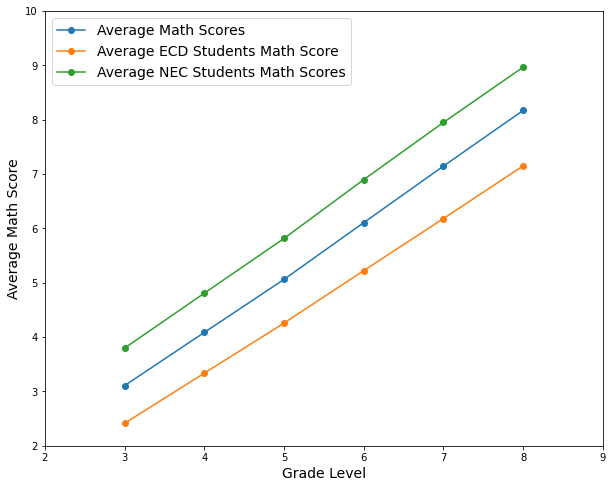

In [12]:
plt.figure(figsize=(10,8))
plt.plot(seda['grade'], seda['Average Math Scores'], marker='o', label='Average Math Scores')
plt.plot(seda['grade'], seda['Average ECD Math Scores'], marker='o', label='Average ECD Students Math Score')
plt.plot(seda['grade'], seda['Average NEC Math Scores'], marker='o', label='Average NEC Students Math Scores')
# plt.title('Average Math Scores for NEC, ECD, and all Students')
plt.ylim(2, 10)
plt.xlim(2, 9)
plt.ylabel('Average Math Score', fontsize=14)
plt.xlabel('Grade Level', fontsize=14)
plt.legend(fontsize=14)

In [131]:
print("Average mean test score gap between ECD and NEC Students in Mathematics: " + str((seda['Average NEC Math Scores'] - seda['Average ECD Math Scores']).mean()))

Average mean test score gap between ECD and NEC Students in Mathematics: 1.6116292695488774


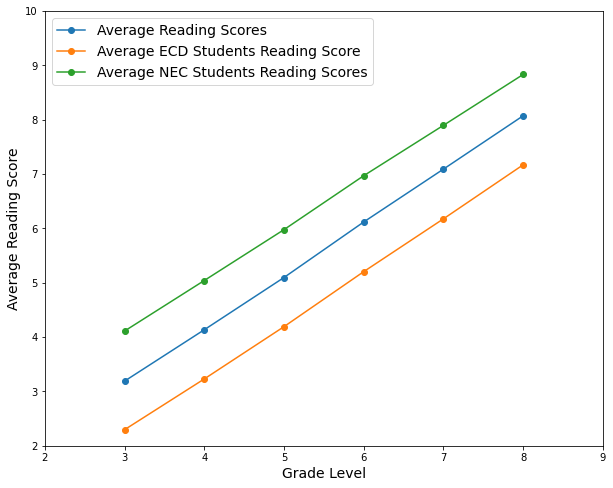

In [26]:
plt.figure(figsize=(10,8))
plt.plot(seda['grade'], seda['Average Reading Scores'], marker='o', label='Average Reading Scores')
plt.plot(seda['grade'], seda['Average ECD Reading Scores'], marker='o', label='Average ECD Students Reading Score')
plt.plot(seda['grade'], seda['Average NEC Reading Scores'], marker='o', label='Average NEC Students Reading Scores')
# plt.title('Average Reading Scores for NEC, ECD, and all Students')
plt.ylim(2, 10)
plt.xlim(2, 9)
plt.ylabel('Average Reading Score', fontsize=14)
plt.xlabel('Grade Level', fontsize=14)
plt.legend(fontsize=14)

In [132]:
print("Average mean test score gap between ECD and NEC Students in Reading: " + str((seda['Average NEC Reading Scores'] - seda['Average ECD Reading Scores']).mean()))

Average mean test score gap between ECD and NEC Students in Reading: 1.759505146009954


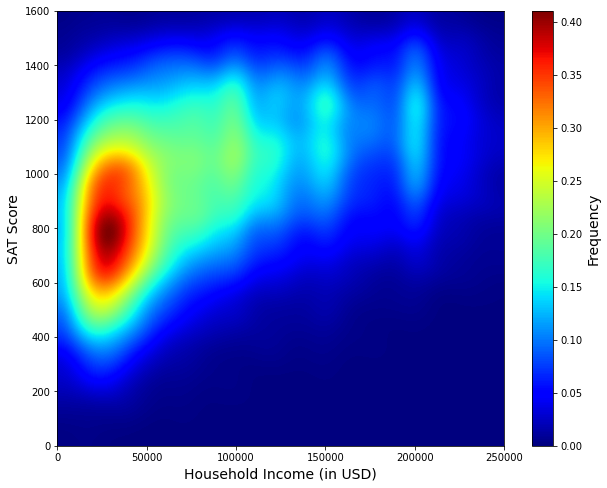

In [25]:
def heatmap(x, y, smoothing, bins=(512,512)):
    heatmap, x, y = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=smoothing)

    extent = [0, maxInc, 0, 1600]
    return heatmap.T, extent

# Adjust what the max income shown on the heatmap is 
maxInc = int(input("Enter a Maximum Income: "))
harvardFiltered = harvard.drop(harvard.index[harvard['FAMILY_INCOME'] >= maxInc])
x = harvardFiltered['FAMILY_INCOME']
y = harvardFiltered['RSAT_TOTAL_SCORE']

# Smooting Factor (Standard deviation for Gaussian Filter.) Blurs or smooths the heatmap for a better look.
smoothing = 16

# Displays the HeatMap
plt.figure(figsize=(10,8))
plt.xlabel("Household Income (in USD)", fontsize=14)
plt.ylabel("SAT Score", fontsize=14)
img, extent = heatmap(x, y, smoothing)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')

# Displays the colourbar on the side
plt.rcParams["axes.formatter.limits"] = (-5, 7)
cb = plt.colorbar()
cb.set_label('Frequency', fontsize=14)

plt.show()

In [127]:
print(harvard.loc[(harvard['FAMILY_INCOME'] > 200000) & (harvard['FAMILY_INCOME'] < 250000)]['RSAT_TOTAL_SCORE'].mean())
print(harvard.loc[(harvard['FAMILY_INCOME'] < 50000)]['RSAT_TOTAL_SCORE'].mean())

1316.090425531915
1140.8040404040405
